In [1]:
from tensorflow.keras.datasets import mnist #載入數據庫中的mnist訓練用資料
from tensorflow.keras.models import Sequential #載入models物件的Sequential(神經序列)方法
from tensorflow.keras.layers import Dense #載入layers(神經層)物件的Dense(密集神經層)方法
from tensorflow.keras import optimizers #載入優化器
from tensorflow.keras.utils import plot_model #載入神經模型圖表
from tensorflow.keras.utils import to_categorical #載入二進制矩陣轉換方法
import matplotlib.pyplot as plt #載入圖表產生方法
import numpy as np #載入數學擴充套件
#魔術方法 讓該套件可以在 IPython直接執行，無須使用 plt.show()來輸出圖表
%matplotlib inline

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #載入mnist訓練用資料
x_train.shape, y_train.shape, x_test.shape, y_test.shape #輸出各資料的規格(數量，長，寬)

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
np.set_printoptions(linewidth=np.inf) #設定輸出規則
x_train[0] #輸出矩陣

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

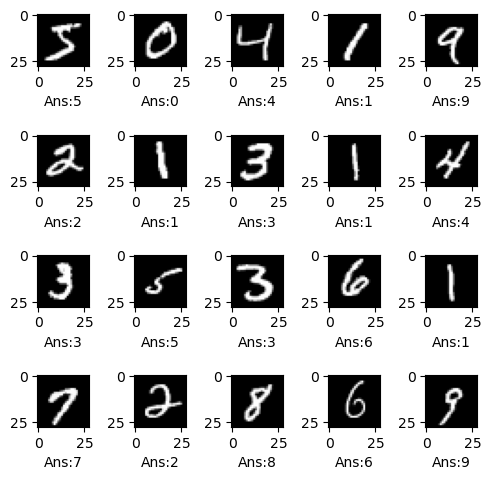

In [4]:
plt.figure(figsize=(5,5)) #設定圖表長寬
#輸出前20張圖
for i in range(20):
    plt.subplot(4, 5, i+1) #設定圖表矩正位置
    plt.imshow(x_train[i], cmap='gray') #設定輸出圖表內容成黑白
    plt.xlabel('Ans:'+ str(y_train[i])) #設定表頭
plt.tight_layout() #自動排列圖表間距

In [5]:
#重塑矩陣並轉型成float32，再轉換成0~1的浮點數
x_train = x_train.reshape(60000,784).astype('float32')/255
x_test = x_test.reshape(10000,784).astype('float32')/255

In [6]:
n_classes = 10
y_train =to_categorical(y_train,n_classes) #二進制矩陣轉換方法
y_test =to_categorical(y_test,n_classes) #二進制矩陣轉換方法

y_train[0] #輸出第一筆的結果

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
model = Sequential() #建立Sequential(神經序列)物件
model.add(Dense(256, activation='LeakyReLU', input_shape=(784,))) #加入輸入層
model.add(Dense(1024, activation='LeakyReLU')) #加入輸第一隱藏層
model.add(Dense(256, activation='LeakyReLU')) #加入第一隱藏層
model.add(Dense(10, activation='softmax')) #加入輸出層
#設定模型使用的優化器、損失函數、準確度評測標準
model.compile(loss='mean_squared_error', optimizer=optimizers.SGD(learning_rate=0.01), metrics=['accuracy'])

model.summary() #顯示當前模型設定值

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              263168    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 729,098
Trainable params: 729,098
Non-trainable params: 0
_________________________________________________________________


In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2) #設定準確度評估來源
#訓練模型
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

model.save_weights('weight_tf_savedmodel_h5', save_format='h5') #輸出權重
model.save('my_model.h5') #輸出訓練模型

313/313 - 1s - loss: 0.0274 - accuracy: 0.8570
Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.0276 - accuracy: 0.8511 - val_loss: 0.0260 - val_accuracy: 0.8615
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0263 - accuracy: 0.8562 - val_loss: 0.0248 - val_accuracy: 0.8667
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0252 - accuracy: 0.8604 - val_loss: 0.0237 - val_accuracy: 0.8697
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.8643 - val_loss: 0.0228 - val_accuracy: 0.8735
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.8680 - val_loss: 0.0220 - val_accuracy: 0.8766
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0226 - accuracy: 0.8710 - val_loss: 0.0213 - val_accuracy: 0.8797
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0219 - accuracy: 0.8744 -


Test accuracy: [0.0628390908241272, 0.6636000275611877]


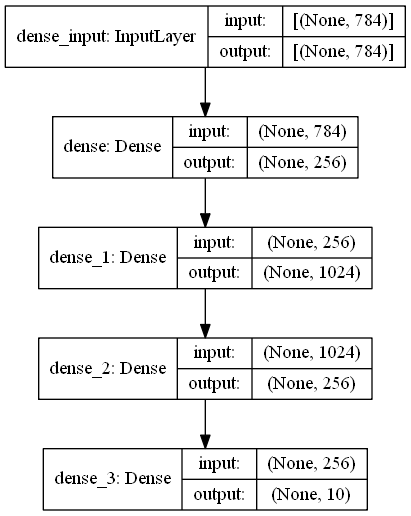

In [12]:
print('\nTest accuracy:', res[1]) #輸出準確度評估
plot_model(model, show_shapes=True) #輸出模型圖表